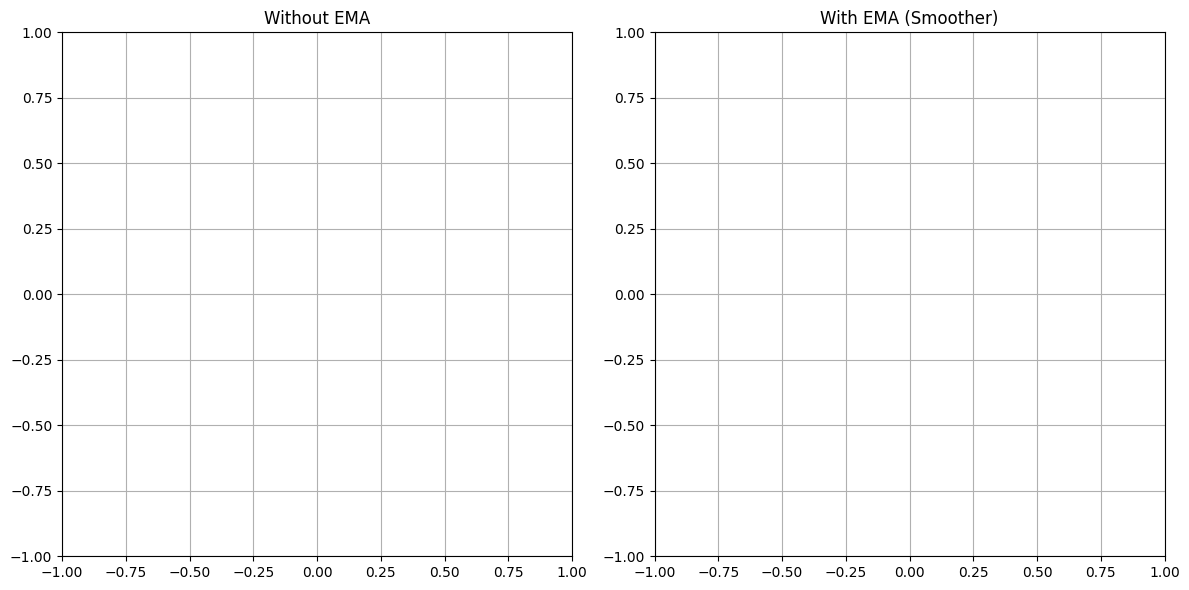

MovieWriter imagemagick unavailable; using Pillow instead.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Settings
np.random.seed(42)
n_points = 5
n_frames = 100
alpha = 0.05  # Smoothing factor for EMA

# Generate random anchor positions simulating encoder updates
true_positions = np.cumsum(np.random.randn(n_frames, n_points, 2) * 0.09, axis=0) # originally * 0.05

# Initialize EMA anchor positions
ema_positions = np.zeros_like(true_positions)
ema_positions[0] = true_positions[0]

# Apply EMA
for t in range(1, n_frames):
    ema_positions[t] = alpha * true_positions[t] + (1 - alpha) * ema_positions[t - 1]

# Setup plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.set_title('Without EMA')
ax2.set_title('With EMA (Smoother)')
for ax in [ax1, ax2]:
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.grid(True)

points_no_ema, = ax1.plot([], [], 'ro', markersize=8)
points_ema, = ax2.plot([], [], 'bo', markersize=8)

# Initialization function for the animation
def init():
    points_no_ema.set_data([], [])
    points_ema.set_data([], [])
    return points_no_ema, points_ema

# Update function for the animation
def animate(frame):
    points_no_ema.set_data(true_positions[frame, :, 0], true_positions[frame, :, 1])
    points_ema.set_data(ema_positions[frame, :, 0], ema_positions[frame, :, 1])
    return points_no_ema, points_ema

# Create animation
ani = FuncAnimation(fig, animate, frames=n_frames, init_func=init, interval=100, blit=True)

plt.tight_layout()
plt.show()
# Save the animation as a GIF
ani.save('../experiments/ema_animation.gif', writer='imagemagick', fps=10)